## Exploratory Data analysis on red wine 

- Shreyas Raghavan 

### Exploratory Data Analysis of the White Wine dataset

The project is aimed at looking and finding deep insights of the white wine dataset. The report also aims in bringing us to a conclusion so as to what are the factors that affect the quality of wine.
The data used is based on the wine quality dataset. The features of the dataset are as follows :- 
1. This dataset has 12 variables which contains :- 
    
        a. 9 variables of ingredient
        b. 2 variables of physical properity 
        c. 1 variable of quantity 
        d. 1 of quality. 
2. The dataset are of the size (4989 , 12).

In [63]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [65]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

### Data and types 

We have 12 columns in our dataset , the type and null counts of the dataset are printed below 

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


From the above descripion , we know that there are no null values and all the values are populated. 

We can see the quality has the datatype int-64 , we also know Quality is an ordinal variable where 1 is the lowest and 10 is the highest. 

#### Dataset Sample 

In [69]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


The above represents the first 5 rows of the dataset. 

### Statistical Summary of the Dataset 

We look at the statistical desription of the dataset :- 

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


We observe the following :- 

1. There maybe a **presence of an outlier** in the following variables :- 

We can see that standard deviation in these variables are high , we can also see that there is a large gap between the 75th percentile (Q3) and maximum value. 
            
            a. Free Sulfur Dioxide 
            b. Total Sulfur Dioxide
            c. Residual Sugar 
            
2. The average quality of wine is around 5.8 
3. We can see denisty has lowest standard deviation , we suspect that the distribution maybe near normal 


## Univariate Analysis 

Univariate analysis helps us in indentifying the distribution of the variables. It gives us much more insight on the Outliers present on the data. 

We do this analysis on every variable to check the trends

In [71]:
import plotly.express as px

In [72]:
def describe2(x):
    x1 = x.describe(percentiles = [0.5]).to_frame().T
    x1['mode'] = x.mode().values
    x1['variance'] = x1['std'] ** 2
    x1['skew'] = x.skew()
    return x1.T

### Quality : 

Quality is the final label , we are trying to understand the feature and their impact on the quality. Higher the quality better/accepted the wine. 

We look at the distribution of Quality in order to understand our dataset

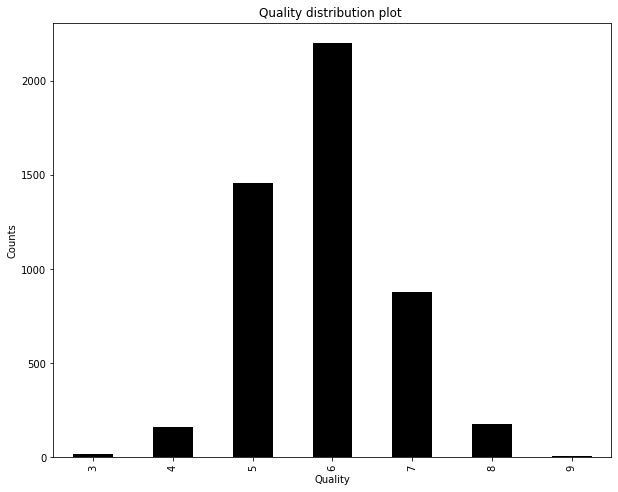

In [100]:
plt.figure(figsize = (10 , 8))
plt.title("Quality distribution plot ")
plt.xlabel('Quality')
plt.ylabel("Counts")
df['quality'].value_counts().sort_index().plot(kind = 'bar',color = 'black' , binwidth = )
plt.show()

**Following is the statistical summary for Quality** 

In [78]:
describe2(df['quality'])

,quality
count,4898.000000
mean,5.877909
std,0.885639
min,3.000000
50%,6.000000
max,9.000000
mode,6.000000
variance,0.784356
skew,0.155796


In [86]:
((df['quality'].value_counts(normalize = True) * 100).round(2).astype('str') + '%').sort_index().to_frame()

,quality
3,0.41%
4,3.33%
5,29.75%
6,44.88%
7,17.97%
8,3.57%
9,0.1%


The mode is at 6 , which means that more people have rated the wines at 6. 

The average Wine quality is 5.8 

We can see that ~44% of the wine are having the quality 6 , ~30% of the wine has the quality 5

## Total Sulfur dioxide

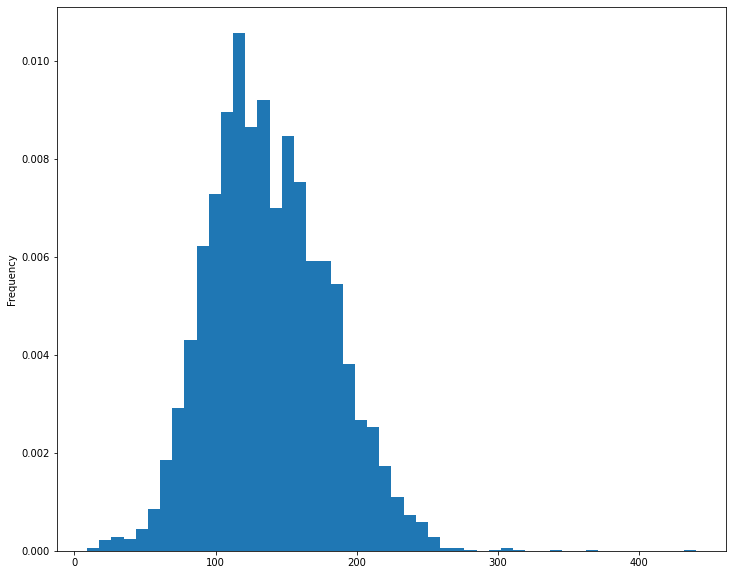

In [91]:
plt.figure(figsize=(12,10))
df['total sulfur dioxide'].plot(kind = 'hist',bins = 50 , density = True)
plt.show()

**For Total Sulfur Dioxide** 

We can see that the distribution is left skewed due to the the presence of outliers 

There are values beyond 300 which is impacting our distribution. Based on the **statistical summary below** 

We can see a very high standard deviation due to the presence of Outliers. 

In [101]:
describe2(df['total sulfur dioxide'])

,total sulfur dioxide
count,4898.000000
mean,138.360657
std,42.498065
min,9.000000
50%,134.000000
max,440.000000
mode,111.000000
variance,1806.085491
skew,0.390710


**We can fix this by doing a logarthmic transformation or by removing the outliers**